# Atividade #4

## Árvore de decisão usando Python

### Importando as bibliotecas

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Lendo o arquivo

In [3]:
# leitura de dados (CSV), separados por ponto e vírgula no nosso caso
df = pd.read_csv('emprestimo.csv',';')
df

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim
5,Alto,Jovem,Alto,Nao,Nao
6,Baixo,Jovem,Alto,Nao,Sim
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
9,Alto,Media,Alto,Sim,Sim


### Transformação dos dados

In [4]:
# factorize – codifica os valores categóricos – árvore de decisão do Python precisa de dados numéricos
df['empresta'],class_names = pd.factorize(df['empresta']) # Nao=0; Sim=1
print(class_names)
print(df['empresta'].unique())

Index(['Nao', 'Sim'], dtype='object')
[0 1]


In [5]:
df['montante'],_ = pd.factorize(df['montante']) # Medio=0; Baixo=1; Alto=2
print(df['montante'].unique())

[0 1 2]


In [6]:
df['idade'],_ = pd.factorize(df['idade']) # Senior=0; Media=1; Jovem=2
print(df['idade'].unique())

[0 1 2]


In [7]:
df['salario'],_ = pd.factorize(df['salario']) # Baixo=0; Alto=1
print(df['salario'].unique())

[0 1]


In [8]:
df['tem_conta'],_ = pd.factorize(df['tem_conta']) # Sim=0; Nao=1
print(df['tem_conta'].unique())

[0 1]


In [9]:
# mostra todo o dataset transformado para numérico
df

,montante,idade,salario,tem_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1


In [10]:
# mostra as primeiras linhas do dataset (útil em caso de grandes datasets)
df.head()

,montante,idade,salario,tem_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1


In [11]:
# mostra informações básicas do dataset como quais colunas (e seus tipos) e uso de memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   montante   14 non-null     int64
 1   idade      14 non-null     int64
 2   salario    14 non-null     int64
 3   tem_conta  14 non-null     int64
 4   empresta   14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


## Treinamento e testes

### Primeira abordagem

#### Mesmos dados usados para Treinamento serão usados para Testes

In [13]:
# Variáveis X são as colunas features e Variáveis Y trata-se da coluna target
# separa as colunas de features (colunas com os dados)
feature_cols = ['montante','idade','salario','tem_conta']
X_train = df[feature_cols]   # Features (conj. dados)
print(X_train)

    montante  idade  salario  tem_conta
0          0      0        0          0
1          0      0        0          1
2          1      0        0          0
3          2      1        0          0
4          2      2        1          0
5          2      2        1          1
6          1      2        1          1
7          0      1        0          0
8          0      2        1          0
9          2      1        1          0
10         0      1        1          1
11         1      2        0          1
12         1      0        1          0
13         2      1        0          1


In [14]:
# separa a coluna target (colunas com os dados das classes)
y_train = df.empresta  # Target variable (conj. dados)
print(y_train)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: empresta, dtype: int64


In [16]:
# mostra as colunas separadas para treinamento
X_train.columns   # nomes das colunas features para treinamento
df.columns[4]     # nome da coluna targer para treinamento

'empresta'

In [17]:
# constrói o modelo usando critério “Entropia”
clf = DecisionTreeClassifier(criterion='entropy')

In [18]:
# treina o modelo – observe que nessa abordagem está usando os mesmos dados para treinamento e testes (sem separação)
clf = clf.fit(X_train,y_train)

In [19]:
# mostra modelo processado
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
# mostra a árvore
fig1 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig1.savefig("fig1.png")

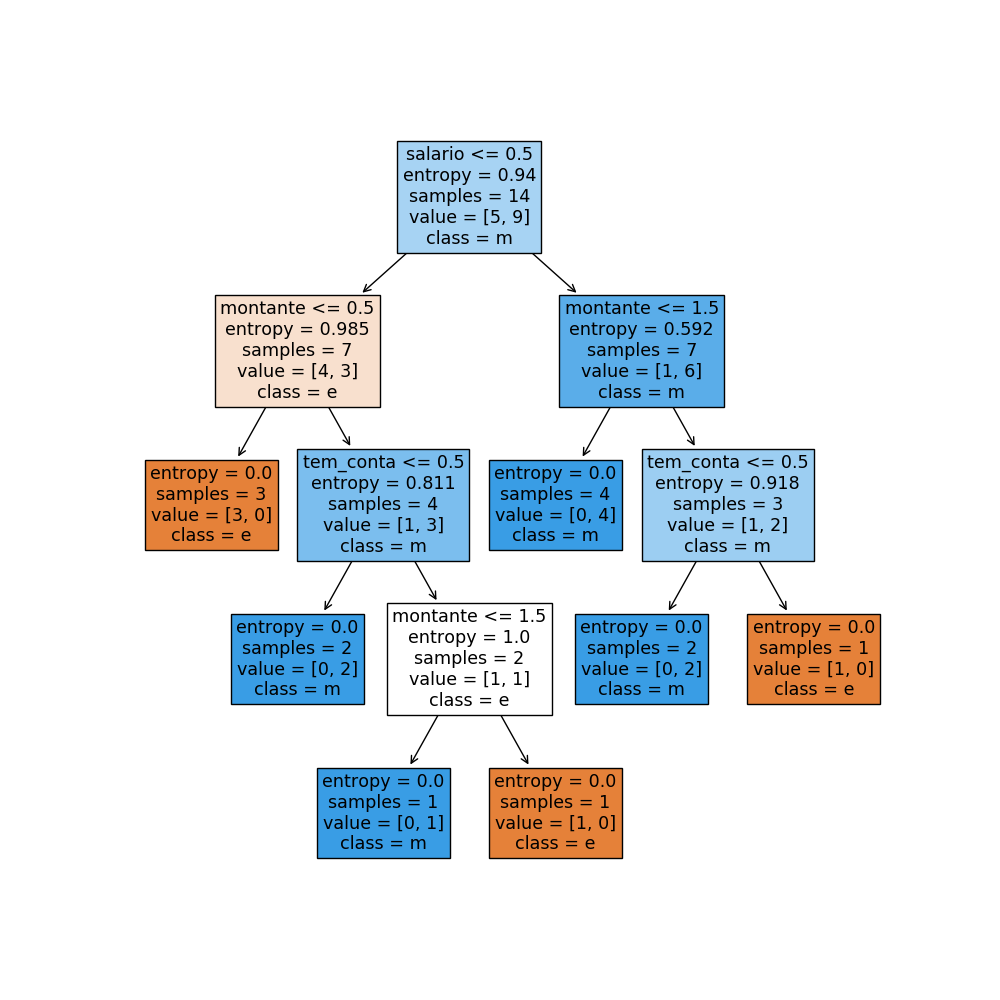

In [37]:
from IPython.display import Image
Image(filename='fig1.png') 

### Segunda abordagem

#### Serão separados 70% dos dados do treinamento e outros 30% para a execução do teste

In [23]:
# separa as colunas de features (colunas com os dados)
feature_cols = ['montante','idade','salario','tem_conta']
X_train = df[feature_cols]   # Features (conj. dados)

In [24]:
# separa a coluna target (colunas com os dados das classes)
y_train = df.empresta   # Target variable (conj. dados)

In [25]:
# Uso do Modelo para fazer Classificações com os dados de Testes
# Para funcionar, deve ser importada a biblioteca:
from sklearn.model_selection import train_test_split

In [26]:
# Separação de dados para Treinamento (train) e Testes (test); Variáveis X são as colunas features e Variáveis Y trata-se da coluna target
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [27]:
# Visualização dos dados de Treinamento e Testes, já separados
X_train
X_test

,montante,idade,salario,tem_conta
3,2,1,0,0
7,0,1,0,0
6,1,2,1,1
2,1,0,0,0
10,0,1,1,1


In [28]:
# constrói o modelo usando critério “Entropia”
clf = DecisionTreeClassifier(criterion='entropy')

In [29]:
# treina o modelo – observe que nessa abordagem está usando os mesmos dados para treinamento e testes (sem separação)
clf = clf.fit(X_train,y_train)

In [30]:
# mostra modelo processado
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

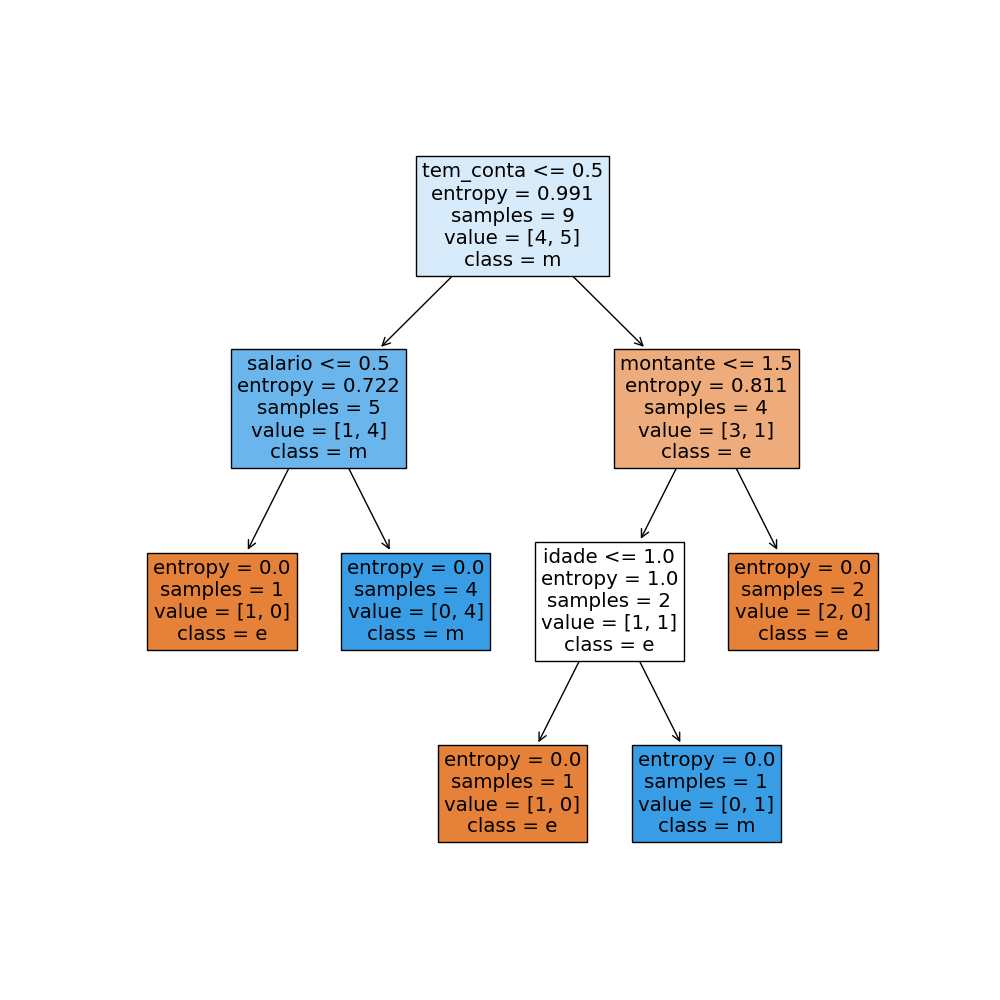

In [38]:
# mostra a árvore
fig2 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig2.savefig("fig2.png")
Image(filename='fig2.png') 

In [32]:
# uso do modelo para fazer predições (classificações) com os dados de testes
y_pred = clf.predict(X_test)

In [33]:
# como o nosso modelo performou ?
# Para funcionar, deve ser importada a biblioteca:
from sklearn import metrics

In [34]:
count_misclassified = (y_test != y_pred).sum()
print('Amostras erroneamente classificadas: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Acuracia: {:.2f}'.format(accuracy))

Amostras erroneamente classificadas: 3
Acuracia: 0.40


In [35]:
# Testando uma amostra especifica!
# Para funcionar, deve ser importada a biblioteca:
import numpy as np

In [36]:
# Para a Entrada montante=1 ; idade=0; salario=1; tem_conta=0
# Qual a classe (saída)?
W_test = np.array ([[1, 0, 1, 0]]) 
y_pred = clf.predict(W_test)
y_pred
# Resposta: 1 (Yes) -

array([1])